In [1]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

class Multiple_Linear_Regression:
    def __init__(self, learning_rate=0.1):
        self.bias = np.random.uniform(low=-0.5, high=0.5)
        self.weights = None
        self.learning_rate = learning_rate
        self.cost_history = []

    # Return training data and labels if no new input is provided
    def resolve_Xy(self, X=None, y=None):
        if X is None or y is None:
            X, y = self.X, self.y
        else:
            X, y = np.array(X), np.array(y)

        return X, y

    # Return training data if no new input is provided
    def resolve_X(self, X=None):
        if X is None:
            X = self.X
        else:
            X = np.array(X)

        return X

    # Model Prediction function
    def predict(self, X=None):
        X = self.resolve_X(X)
        return ( np.dot(X, self.weights) + self.bias )

    # Calculating the MSE
    def error(self, X:list, y:list):
        X, y = self.resolve_Xy(X, y)

        return ( self.predict(X) - y )

    # Calculating the RMSE
    def rmse(self, X=None, y=None):
        X, y = self.resolve_Xy(X, y)
        errors = self.error(X, y)

        return np.sqrt(np.mean(errors ** 2))

    # Calculating the cost function
    def cost_function(self, X=None, y=None):
        X, y = self.resolve_Xy(X, y)

        errors = self.error(X, y)
        return (1 / (2 * len(X))) * np.sum(errors ** 2)

    # Calculating the gradient descent
    def gradient_descent(self):
        X, y = self.X, self.y

        errors = self.error(X, y)

        self.weights -= self.learning_rate * ( (1 / len(X)) * ( np.dot(errors, X) ) )
        self.bias -= self.learning_rate * ( 1 / len(X) * np.sum(errors) )

    # Training loop
    def train(self, X:list, y:list, epochs:int):
        # Storing input and output data for less function parameters
        self.X, self.y = np.array(X), np.array(y)

        self.weights = np.random.uniform(low=-0.5, high=0.5, size=X.shape[1])

        for epoch in range(1, epochs+1):
            self.cost_history.append(self.cost_function(X, y))
            if epoch % 100 == 0:
                print(f"Epoch {epoch}: {self.rmse()}")
            self.gradient_descent()

    # Test function
    def test(self, X:list, y:list):
        print(f"RMSE of test data: {self.rmse(X, y)}")

    # Plotting cost over time
    def plot_cost_history(self):
        plt.figure(figsize=(10, 5))
        plt.plot(range(1, len(self.cost_history) + 1), self.cost_history)
        plt.xlabel("Epochs")
        plt.ylabel("Cost Function (MSE)")
        plt.title("Cost Function Decrease Over Time")
        plt.grid(True)
        plt.show()


Epoch 100: 96.26218876349824
Epoch 200: 80.34115227911619
Epoch 300: 77.83128572141648
Epoch 400: 77.35892724785828
Epoch 500: 77.16625507111989
Epoch 600: 77.01204525716442
Epoch 700: 76.86381376128128
Epoch 800: 76.71719409422037
Epoch 900: 76.57159597592133
Epoch 1000: 76.42693607665917
RMSE of test data: 71.75150766499351


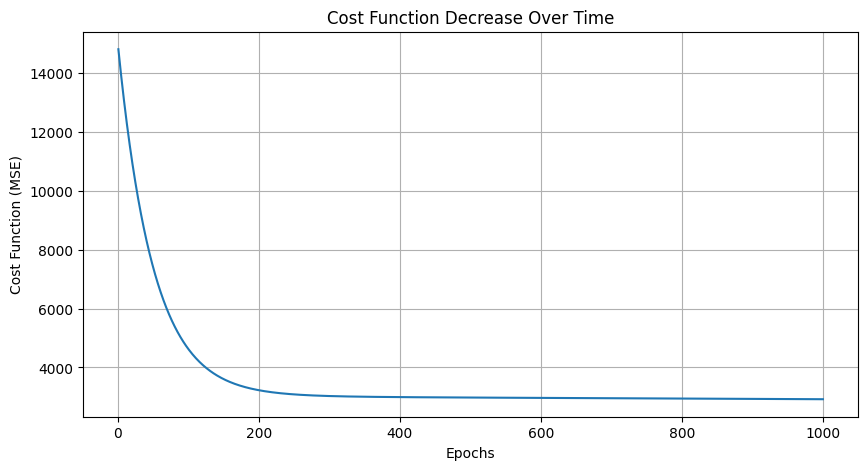

In [2]:
# Loading the diabetes dataset
X, y = datasets.load_diabetes(return_X_y=True)

# Selecting columns: bmi(2), bp(3), s5(8)
X = X[:, [2, 3, 8]]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

multiple_lin_reg = Multiple_Linear_Regression(learning_rate=0.01)
multiple_lin_reg.train(X_train, y_train, epochs=1000)
multiple_lin_reg.test(X_test, y_test)
multiple_lin_reg.plot_cost_history()